# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(mouse_metadata, study_results,how = "outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [3]:
# Checking the number of mice.
num_mice = combined_mouse_data["Mouse ID"].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] == duplicate_mouse_ids[0]]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data[~combined_mouse_data['Mouse ID'].isin(duplicate_data)==True]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [7]:
# Checking the number of mice in the clean DataFrame.
number_mice = clean_df["Mouse ID"].nunique()
number_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

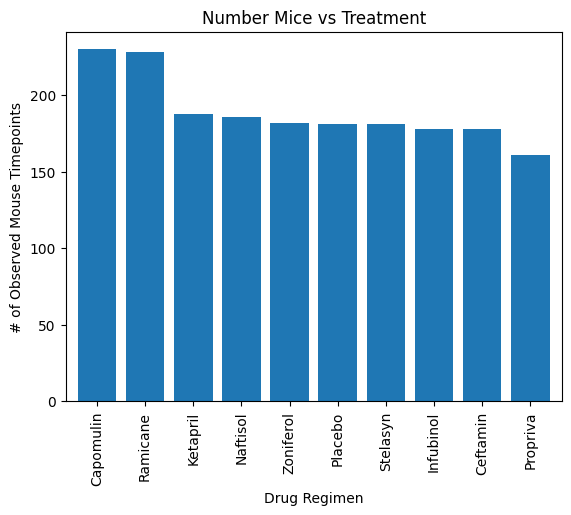

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind='bar', color='tab:blue', title = "Number Mice vs Treatment", align="center", width=0.8)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
#looks like placebo and stelasyn switched places from the example but they are same in count so dont think it matters

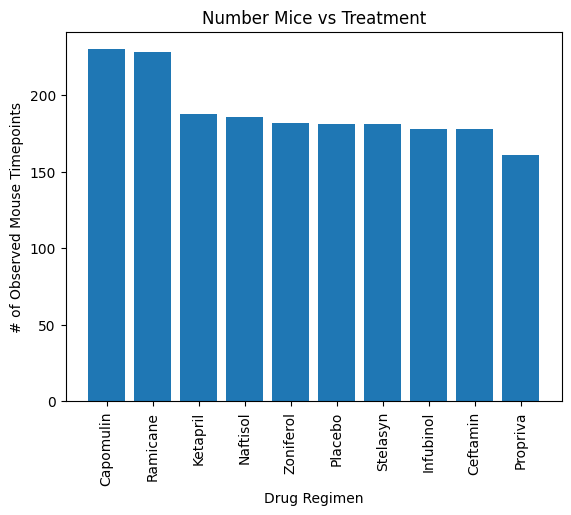

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#x_axis = clean_df["Drug Regimen"].unique().tolist()
x_axis = clean_df["Drug Regimen"].value_counts().index.values
y_axis = clean_df["Drug Regimen"].value_counts().values
plt.bar(x_axis, y_axis, color='tab:blue', align='center', width=0.8)
plt.title("Number Mice vs Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


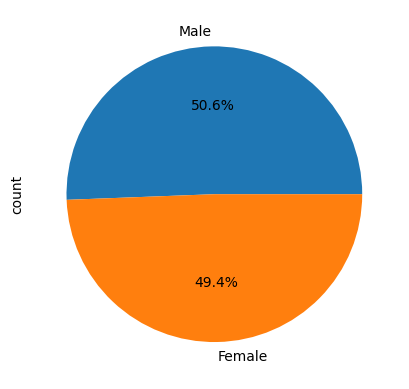

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
clean_df["Sex"].value_counts().plot(kind='pie', autopct= "%0.1f%%")
# Make the pie chart
plt.show()

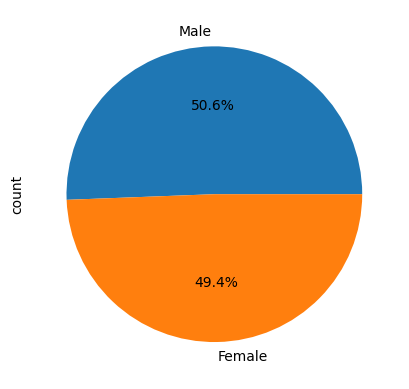

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = clean_df["Sex"].value_counts().index.values
sizes = clean_df["Sex"].value_counts().values
plt.pie(sizes, labels=labels, autopct="%0.1f%%")
plt.ylabel('count')
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

new_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
new_df = new_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merge = new_df.merge(clean_df, how = "left", on=["Mouse ID", "Timepoint"])
new_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capo = []
tumor_rami = []
tumor_infu = []
tumor_ceft = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    #tumor_vol.append(new_merge.loc[new_merge["Drug Regimen"] == i,"Tumor Volume (mm3)"])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in new_merge.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capo.append(row['Tumor Volume (mm3)'])
    elif row["Drug Regimen"] == 'Ramicane':
        tumor_rami.append(row['Tumor Volume (mm3)'])
    elif row["Drug Regimen"] == 'Infubinol':
        tumor_infu.append(row['Tumor Volume (mm3)'])
    elif row["Drug Regimen"] == 'Ceftamin':
        tumor_ceft.append(row['Tumor Volume (mm3)'])

    # add subset
combined_subset = pd.DataFrame({treatments[0]: tumor_capo,
                                treatments[1]: tumor_rami,
                                treatments[2]: tumor_infu,
                                treatments[3]: tumor_ceft})
combined_subset
    # Determine outliers using upper and lower bounds
for drug in treatments:    
    quartiles = combined_subset[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    print(quartiles)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Capomulin, dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Ramicane, dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Infubinol, dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Ceftamin, dtype: float64


Text(0, 0.5, 'Final Tumor Volume (mm3)')

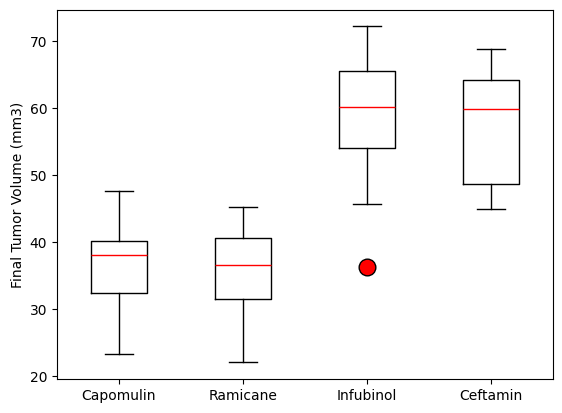

In [35]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#plt.boxplot(combined_subset, color = dict(boxes = 'k', whiskers='k', medians='b'))
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
boxplot = combined_subset.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='r'), flierprops = flierprops)
boxplot.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

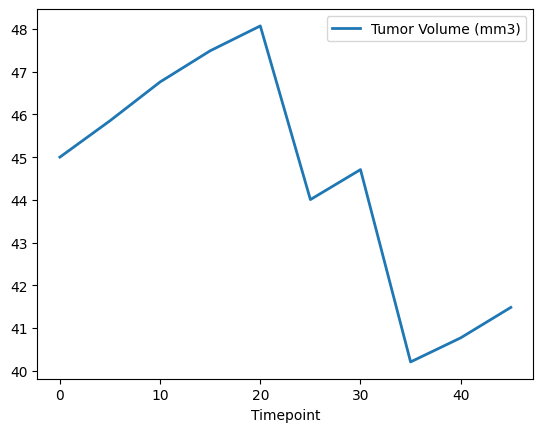

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509") ]
capomulin_mouse = capomulin_mouse.sort_values('Timepoint')
mouse_line = capomulin_mouse[['Timepoint','Tumor Volume (mm3)']]
mouse_line = mouse_line.set_index('Timepoint')
mouse_line.plot(linewidth = 2, color='tab:blue')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

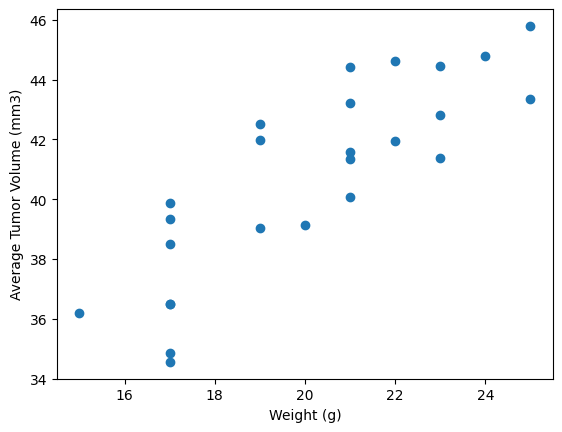

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_data = capomulin_data.groupby("Mouse ID")
weight = capomulin_data['Weight (g)'].mean()
tumor_volume = capomulin_data['Tumor Volume (mm3)'].mean()
avg_capomulin = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": tumor_volume})
plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"],color = 'tab:blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

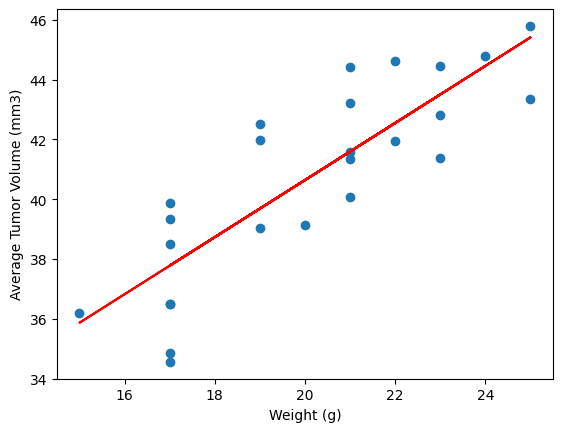

In [83]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_values = (slope, intercept,  rvalue, pvalue, stderr) = st.linregress(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])
y = avg_capomulin["Weight (g)"]* slope + intercept
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation_values[2],2)}')
plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"],color = 'tab:blue')
plt.plot(avg_capomulin["Weight (g)"], y, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')